<a href="https://colab.research.google.com/github/fallsoumaya/projets_scolaires_iibs/blob/main/Machine_Learninge_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet 1 : Modèle de classification pour prédire la pluie

In [2]:
# Bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Chargement des données
df = pd.read_csv('weather.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,366.0,7.265574,6.025800,-5.3,2.300,7.45,12.500,20.9
MaxTemp,366.0,20.550273,6.690516,7.6,15.025,19.65,25.500,35.8
Rainfall,366.0,1.428415,4.225800,0.0,0.000,0.00,0.200,39.8
Evaporation,366.0,4.521858,2.669383,0.2,2.200,4.20,6.400,13.8
Sunshine,363.0,7.909366,3.481517,0.0,5.950,8.60,10.500,13.6
WindGustSpeed,364.0,39.840659,13.059807,13.0,31.000,39.00,46.000,98.0
WindSpeed9am,359.0,9.651811,7.951929,0.0,6.000,7.00,13.000,41.0
WindSpeed3pm,366.0,17.986339,8.856997,0.0,11.000,17.00,24.000,52.0
Humidity9am,366.0,72.035519,13.137058,36.0,64.000,72.00,81.000,99.0
Humidity3pm,366.0,44.519126,16.850947,13.0,32.250,43.00,55.000,96.0


In [5]:
# Valeurs manquantes
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31
WindDir3pm,1
WindSpeed9am,7


In [9]:
# Imputation des valeurs manquantes par la médiane pour les colonnes Sunshine, WindGustSpeed, WindSpeed9am
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)


/tmp/ipython-input-9-1393742445.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
/tmp/ipython-input-9-1393742445.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [10]:
# Verification
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,3
WindGustSpeed,0
WindDir9am,31
WindDir3pm,1
WindSpeed9am,0


In [11]:
# Imputation des valeurs manquantes par le mode pour WindGustDir, WindDir9am, WindDir3pm
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)

# Verification
df.isnull().sum()

/tmp/ipython-input-11-46071981.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
/tmp/ipython-input-11-46071981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [13]:
# Supprmier les valeurs dupliquées
df.drop_duplicates(inplace=True)
#verification
df.duplicated().sum()

np.int64(0)

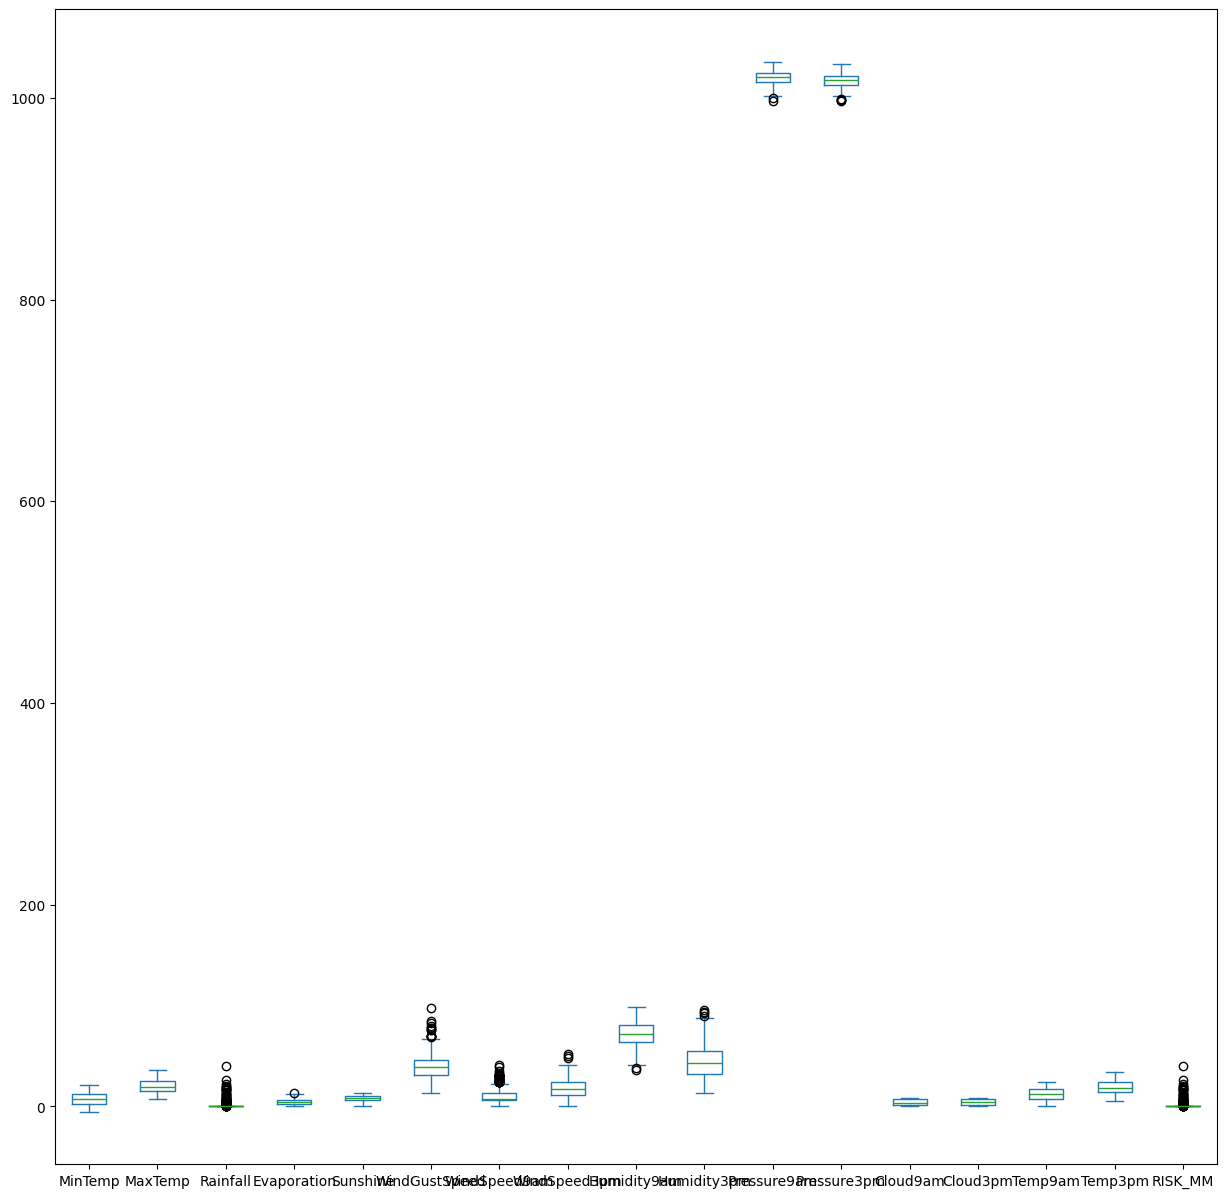

In [24]:
# Boxplot de toutes les colonnes pour voir les outliers
df.plot(kind='box', figsize=(15, 15))
plt.show()

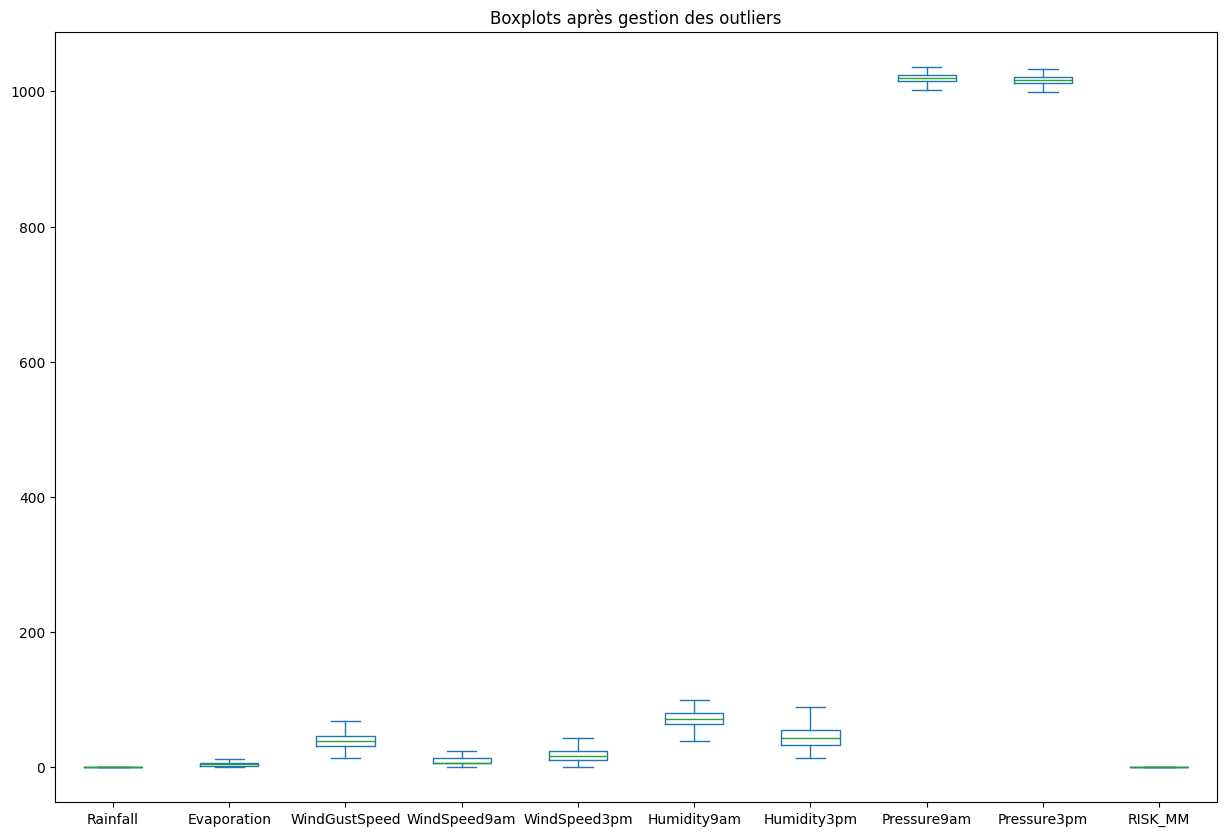

In [26]:
# Gestion des outliers pour Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3am, Humidity9am, Humidity3am, Pressure9am, Pressure3am, RISK_MM

cols_avec_outliers = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RISK_MM']

# Méthode des IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

for col in cols_avec_outliers:
    df = cap_outliers_iqr(df.copy(), col)

# Verification
df[cols_avec_outliers].plot(kind='box', figsize=(15, 10))
plt.title('Boxplots après gestion des outliers')
plt.show()

In [32]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29.0,1019.7,1015.0,7,7,14.4,23.6,No,0.5,Yes
1,14.0,26.9,0.5,4.4,9.7,ENE,39.0,E,W,4.0,...,36.0,1012.4,1008.4,5,3,17.5,25.7,Yes,0.5,Yes
2,13.7,23.4,0.5,5.8,3.3,NW,68.5,N,NNE,6.0,...,69.0,1009.5,1007.2,8,7,15.4,20.2,Yes,0.5,Yes
3,13.3,15.5,0.5,7.2,9.1,NW,54.0,WNW,W,23.5,...,56.0,1005.5,1007.0,2,7,13.5,14.1,Yes,0.5,Yes
4,7.6,16.1,0.5,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49.0,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [33]:
# Encodage des colonnes WindGustDir, WindDir9am, WindDir3am
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [35]:
# Encodage binaire de RainToday,RainTomorrow
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [39]:
# Séparation des Features et du Target(RainToday)
X = df.drop(['RainToday'], axis=1)
y = df['RainToday']

In [40]:
# Séparation des données test et celles d'entraienement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Modele de classification de Naive Bayes pour prédire la pluie
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modele = GaussianNB()
modele.fit(X_train, y_train)
y_pred = modele.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.972972972972973


In [44]:
# Tester le modele avec les données tests
print(classification_report(y_test, y_pred))
# Matrice de confusion
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.94      0.94      0.94        16

    accuracy                           0.97        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.97      0.97        74

[[57  1]
 [ 1 15]]


# Projet 2 : Modèle de régression pour prédire le prix d'une maison

In [45]:
# Chargement des données
data = pd.read_csv('house.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [48]:
# Supprimer id et convertir date en datetime
data.drop('id', axis=1, inplace=True)
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
# Valeurs manquantes
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


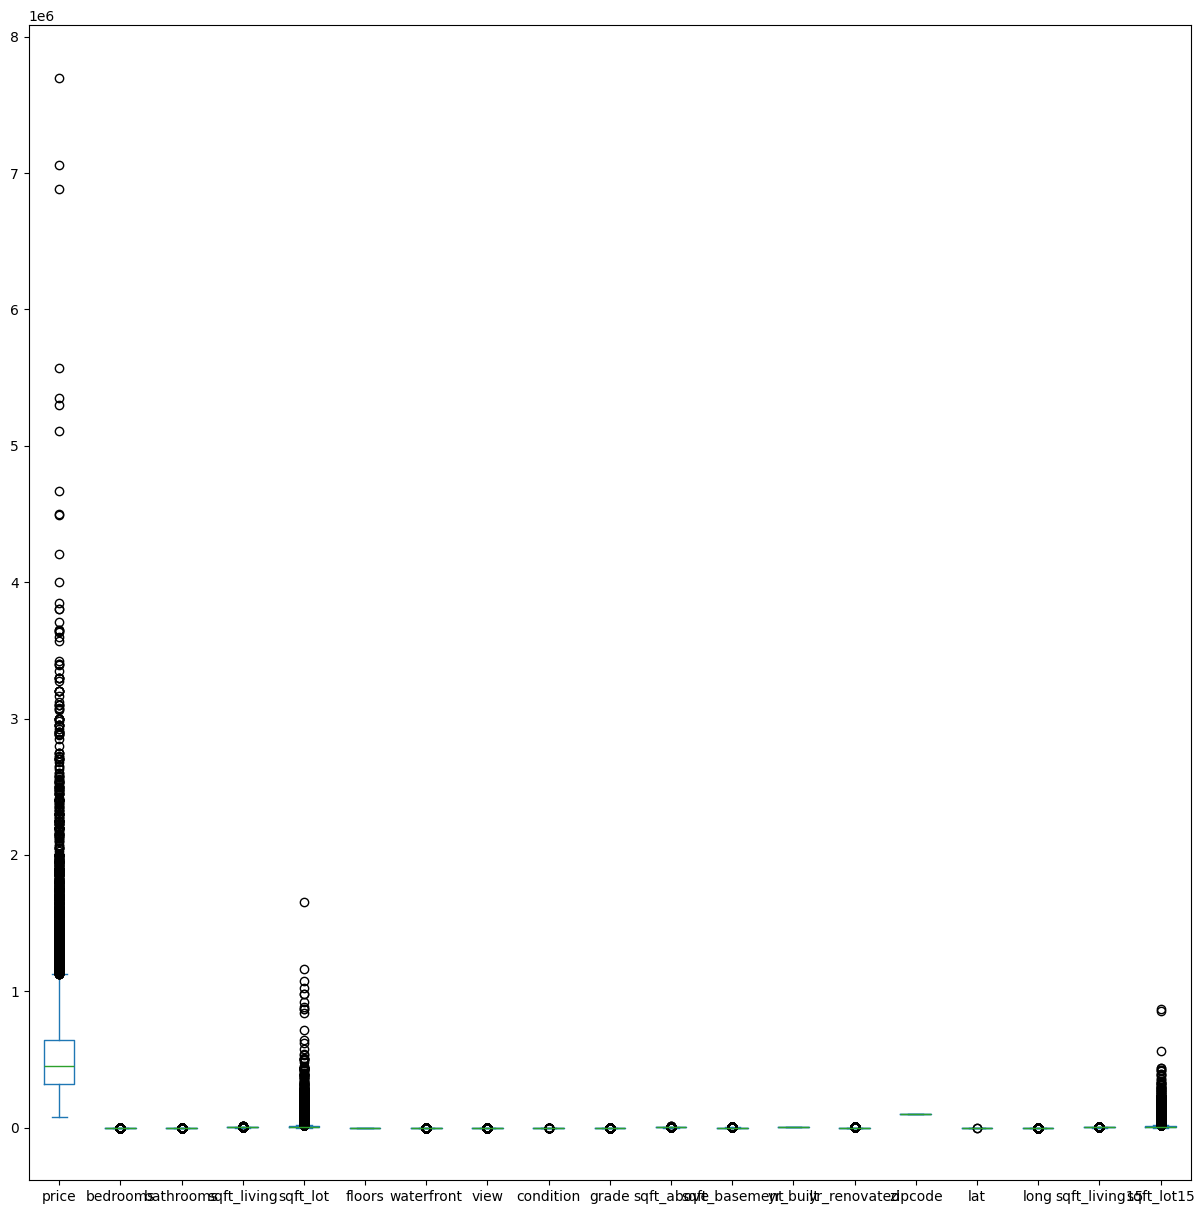

In [50]:
# Outliers
data.plot(kind='box', figsize=(15, 15))
plt.show()

In [53]:
# liste des colonnes numeriques
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

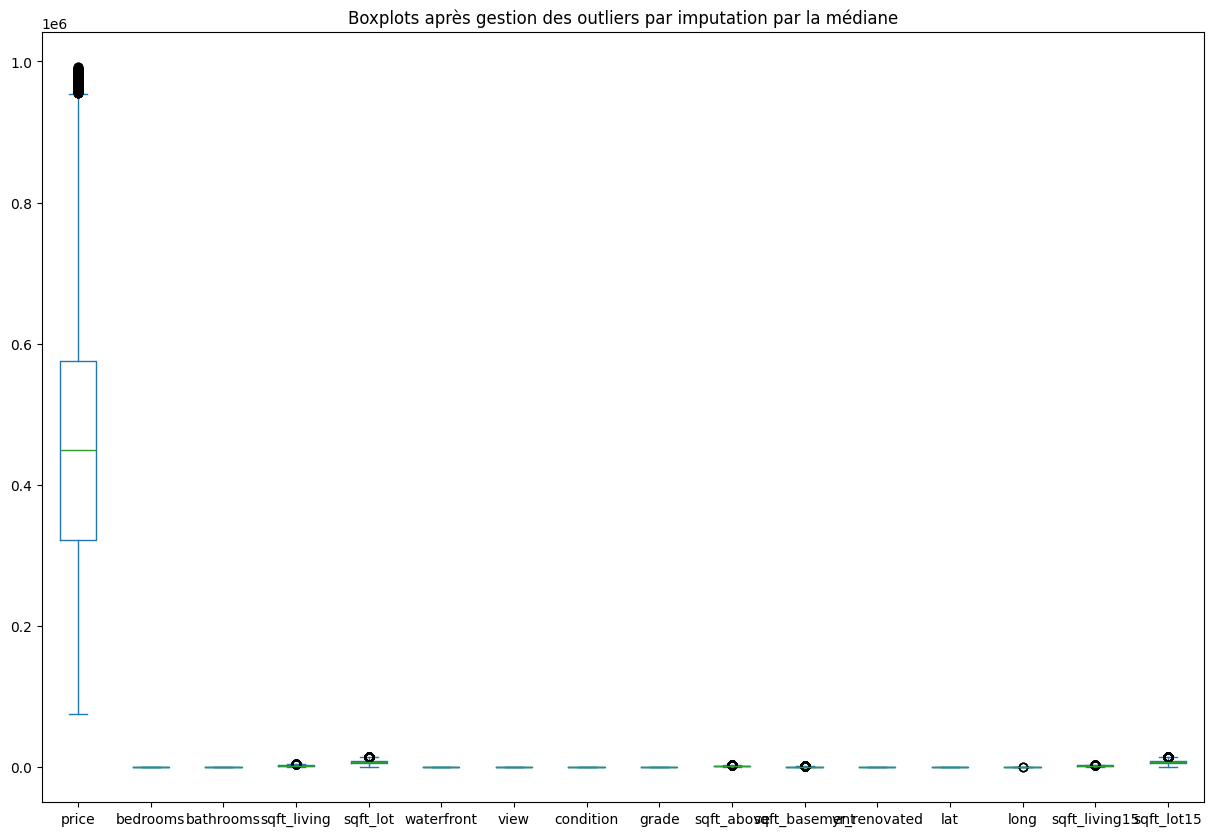

In [57]:
# Gestion des outliers par imputation par la médiane des colonnes 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'lat', 'long','sqft_living15', 'sqft_lot15'

# Imputation par la médiane pour les colonnes spécifiées
cols_a_imputer = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_renovated', 'lat', 'long','sqft_living15', 'sqft_lot15']

for col in cols_a_imputer:
  # IQR
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR

  data[col] = np.where(data[col] > upper_bound, data[col].median(), data[col])
  data[col] = np.where(data[col] < lower_bound, data[col].median(), data[col])
# Verification
data[cols_a_imputer].plot(kind='box', figsize=(15, 10))
plt.title('Boxplots après gestion des outliers par imputation par la médiane')
plt.show()

In [56]:
# Gestion des valeurs qui subsistent comme  des outliers au niveau de price, sqft_living, sqft_lot, sqft_above, sqft_basement, long, sqft_living15, sqft_lot15


In [59]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951,0.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


In [73]:
# Separation des features et du target (price)
X = data.drop(['price'], axis=1)
y = data['price']

In [74]:
# Séparation des données test et celles d'entraienement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17290 non-null  datetime64[ns]
 1   bedrooms       17290 non-null  float64       
 2   bathrooms      17290 non-null  float64       
 3   sqft_living    17290 non-null  float64       
 4   sqft_lot       17290 non-null  float64       
 5   floors         17290 non-null  float64       
 6   waterfront     17290 non-null  float64       
 7   view           17290 non-null  float64       
 8   condition      17290 non-null  float64       
 9   grade          17290 non-null  float64       
 10  sqft_above     17290 non-null  float64       
 11  sqft_basement  17290 non-null  float64       
 12  yr_built       17290 non-null  int64         
 13  yr_renovated   17290 non-null  float64       
 14  zipcode        17290 non-null  int64         
 15  lat            17290 

In [76]:
# Encodage de date
X_train['date'] = X_train['date'].apply(lambda x: x.toordinal())
X_test['date'] = X_test['date'].apply(lambda x: x.toordinal())
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17290 non-null  int64  
 1   bedrooms       17290 non-null  float64
 2   bathrooms      17290 non-null  float64
 3   sqft_living    17290 non-null  float64
 4   sqft_lot       17290 non-null  float64
 5   floors         17290 non-null  float64
 6   waterfront     17290 non-null  float64
 7   view           17290 non-null  float64
 8   condition      17290 non-null  float64
 9   grade          17290 non-null  float64
 10  sqft_above     17290 non-null  float64
 11  sqft_basement  17290 non-null  float64
 12  yr_built       17290 non-null  int64  
 13  yr_renovated   17290 non-null  float64
 14  zipcode        17290 non-null  int64  
 15  lat            17290 non-null  float64
 16  long           17290 non-null  float64
 17  sqft_living15  17290 non-null  float64
 18  sqft_lot

In [78]:
# Modele de regression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
# Verification de la fiabilité du modele
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 16427169594.724327
R2: 0.5207334385501529
